In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [36]:
df = pd.read_csv('sales.csv')
df.head()

order_id                       name           ordered_at  price  quantity  \
0     10000   "ICE CREAM" Peanut Fudge  2018-01-01 11:30:00  $3.50         3   
1     10000   "ICE CREAM" Peanut Fudge  2018-01-01 11:30:00  $3.50         1   
2     10001         "SORBET" Raspberry  2018-01-01 12:14:54  $2.50         2   
3     10001                        NaN  2018-01-01 12:14:54  $1.50         1   
4     10001  "CONE" Dipped Waffle Cone  2018-01-01 12:14:54  $3.50         1   

  line_total  
0     $10.50  
1      $3.50  
2      $5.00  
3      $1.50  
4      $3.50

In [22]:
df.shape

(29922, 6)

In [23]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [39]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [37]:
def remove_dollar(args):
    return pd.Series([args['price'].replace("$",""), args['line_total'].replace("$","")])
df[['price','line_total']] = df[['price','line_total']].apply(remove_dollar, axis=1)
df[['price','line_total']] = df[['price','line_total']].astype("float")
df

order_id                        name           ordered_at  price  \
0         10000    "ICE CREAM" Peanut Fudge  2018-01-01 11:30:00    3.5   
1         10000    "ICE CREAM" Peanut Fudge  2018-01-01 11:30:00    3.5   
2         10001          "SORBET" Raspberry  2018-01-01 12:14:54    2.5   
3         10001                         NaN  2018-01-01 12:14:54    1.5   
4         10001   "CONE" Dipped Waffle Cone  2018-01-01 12:14:54    3.5   
...         ...                         ...                  ...    ...   
29917     18452  "ICE CREAM" Dulce De Leche  2018-06-26 03:56:13   -1.5   
29918     12889  "ICE CREAM" Dark Chocolate  2018-03-03 10:06:21    4.0   
29919     14526    "ICE CREAM" Peanut Fudge  2018-04-05 17:33:24    3.5   
29920     19589   "CONE" Dipped Waffle Cone  2018-07-20 09:10:01    3.5   
29921     19270       "ICE CREAM" Earl Gray  2018-07-13 09:20:21    0.5   

       quantity  line_total  
0             3        10.5  
1             1         3.5  
2             2         5.0  
3             1         1.5  
4             1         3.5  
...         ...         ...  
29917         2        -3.0  
29918         3        12.0  
29919         3        10.5  
29920         2         7.0  
29921         2         1.0  

[29922 rows x 6 columns]

In [40]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [27]:
df[df.duplicated()].shape[0]

538

In [28]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [29]:
df[df['name'].isnull()].head()

order_id name          ordered_at  price  quantity  line_total
3      10001  NaN 2018-01-01 12:14:54    1.5         1         1.5
6      10002  NaN 2018-01-01 12:23:09    3.0         3         9.0
27     10007  NaN 2018-01-01 15:03:17    2.5         1         2.5
77     10026  NaN 2018-01-02 03:25:40    0.5         2         1.0
88     10031  NaN 2018-01-02 05:45:48    3.5         3        10.5

#### Sanity check for value ranges and to check assumptions

In [30]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [31]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [32]:
df.describe()

order_id         price      quantity    line_total
count  29922.000000  29922.000000  29922.000000  29922.000000
mean   14992.538701      2.463689      2.002105      4.932007
std     2889.466576      1.167876      0.819225      3.244797
min    10000.000000     -4.000000      1.000000    -12.000000
25%    12498.000000      1.500000      1.000000      2.500000
50%    14972.000000      2.500000      2.000000      4.000000
75%    17506.750000      3.500000      3.000000      7.500000
max    19999.000000      4.000000      3.000000     12.000000

#### TODO: Get value between "" in name and put it in category column

In [33]:
df.head()

order_id                       name          ordered_at  price  quantity  \
0     10000   "ICE CREAM" Peanut Fudge 2018-01-01 11:30:00    3.5         3   
1     10000   "ICE CREAM" Peanut Fudge 2018-01-01 11:30:00    3.5         1   
2     10001         "SORBET" Raspberry 2018-01-01 12:14:54    2.5         2   
3     10001                        NaN 2018-01-01 12:14:54    1.5         1   
4     10001  "CONE" Dipped Waffle Cone 2018-01-01 12:14:54    3.5         1   

   line_total  
0        10.5  
1         3.5  
2         5.0  
3         1.5  
4         3.5

#### Analysis, finally!

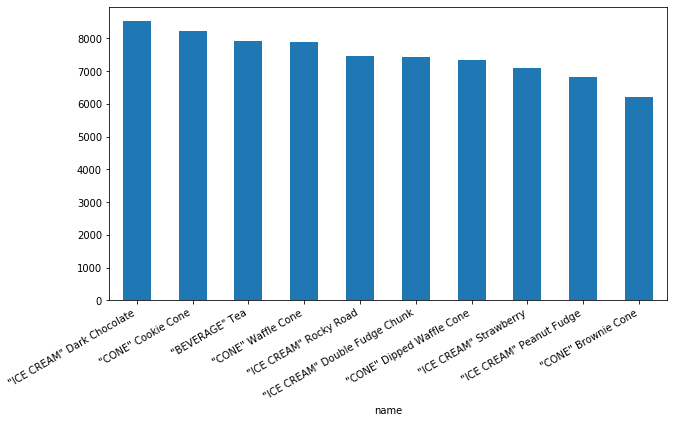

In [34]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()